<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from scipy import stats

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = r"C:\Users\OmarZazou\OneDrive - Ediom Pty Ltd\Documents\Resources\Data Science Course\Course Material\DATA\winequality_merged.csv"

#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# ANSWER
wine = pd.read_csv(wine_csv)

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
wine.shape

(6497, 13)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [7]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [10]:
corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


<Axes: >

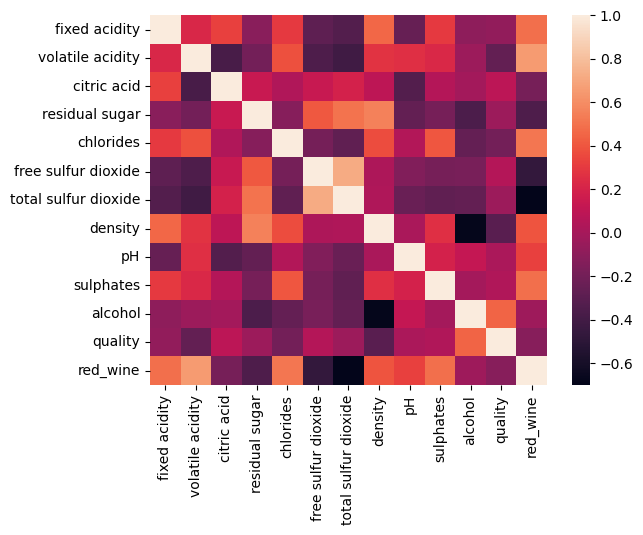

In [11]:
sns.heatmap(corr)

### 2. Set Target Variable

Create a target variable for wine quality.

In [12]:
# Target Variable
y = wine.quality

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

In [13]:
# ANSWER
X = wine[['alcohol', 'citric acid', 'free sulfur dioxide']]

I used the predictor variables alcohol, citric acid and free sulphur dioxide because they are the 3 variables with the highest correlation as per the correlation table and heatmap above.

### 4. Using Linear Regression Create a Model and Test Score

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
# Create a model for Linear Regression
linreg = LinearRegression()
# Fit the model with the Training data
linreg.fit(X_train,y_train)
# Calculate the score (R^2 for Regression) for Training Data
rsquared_train = linreg.score(X_train, y_train)
# Calculate the score (R^2 for Regression) for Testing Data
rsquared_test = linreg.score(X_test, y_test)

C:\Users\OmarZazou\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\OmarZazou\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\OmarZazou\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\OmarZazou\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

In [19]:
print(linreg.coef_, linreg.intercept_)
print(rsquared_train)
print(rsquared_test)

[0.3490966  0.43098745 0.0069271 ] 1.8049551664240493
0.2270573712234717
0.19782720450540114


It is expected that the rsquared value would be higher for the train set compared to the test set because the model is built for that train set. We cannot however use that rsquared value for the train set because it has already seen the data and teh accuracy of the model will always be lower for the train set or predicted values.

## BONUS: Cross validation

In [20]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [29]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True, random_state=42)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    
    linreg.fit(X_train, y_train)
    
    # Make predictions with training and test set
    
    pred_train = linreg.predict(X_train)
    pred_test = linreg.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    
    train_scores.append(linreg.score(X_train,y_train))
    test_scores.append(linreg.score(X_test,y_test))
    
    train_rmse.append(mean_squared_error(y_train, pred_train, squared=False))
    test_rmse.append(mean_squared_error(y_test, pred_test, squared=False))
    
    
# Create a metrics_df dataframe to display r2 and rmse scores

metrics_df = pd.DataFrame({'Training R2': train_scores,
                           'Test R2': test_scores,
                           'Training RMSE': train_rmse,
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range (5)])

metrics_df

C:\Users\OmarZazou\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\OmarZazou\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\OmarZazou\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\OmarZazou\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.227057,0.197827,0.770650,0.769703
2,0.217648,0.236942,0.772328,0.762675
3,0.218489,0.232850,0.770962,0.768207
4,0.220836,0.224136,0.768400,0.778420
5,0.224300,0.210019,0.769355,0.774728


In [30]:
# Describe the metrics
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.221666,0.220355,0.770339,0.770747
std,0.003966,0.016278,0.001514,0.006071
min,0.217648,0.197827,0.768400,0.762675
25%,0.218489,0.210019,0.769355,0.768207
50%,0.220836,0.224136,0.770650,0.769703
75%,0.224300,0.232850,0.770962,0.774728
max,0.227057,0.236942,0.772328,0.778420


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data?

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



